In [1]:
from pathlib import Path
import glob
import geopandas as gpd
from utils import *

### Location where data is stored

In [2]:
DATA_DIR = Path("/datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/")
SHAPEFILE_DIR = Path("/datadrive/MODIS_NDVI_Alaska/modis/shps/")

ANWR_DIR = DATA_DIR / "anwr"
IVOTUK_DIR = DATA_DIR / "brw_atq_ivotuk"
PRUDHOEBAY_DIR = DATA_DIR / "prudhoebay"
ANWR_SHAPEFILE_DIR = SHAPEFILE_DIR / "ANWR.shp"
IVOTUK_SHAPEFILE_DIR = SHAPEFILE_DIR / "Brw_Atq_Ivotuk.shp"
PRUDHOEBAY_SHAPEFILE_DIR = SHAPEFILE_DIR / "PrudhoeBay.shp"

### Read all files, sort, and make_dictionary

In [3]:
anwr_files = glob.glob(str(ANWR_DIR / "*"))
ivotuk_files = glob.glob(str(IVOTUK_DIR / "*"))
prudhoebay_files = glob.glob(str(PRUDHOEBAY_DIR / "*"))
anwr_files.sort()
prudhoebay_files.sort()
ivotuk_files.sort()
files = {"anwr": anwr_files,
        "ivotuk": ivotuk_files,
        "prudhoebay": prudhoebay_files}
anwr_label_file = gpd.read_file(ANWR_SHAPEFILE_DIR)
ivotuk_label_file = gpd.read_file(IVOTUK_SHAPEFILE_DIR)
prudhoebay_label_file = gpd.read_file(PRUDHOEBAY_SHAPEFILE_DIR)
labels = {"anwr": anwr_label_file,
        "ivotuk": ivotuk_label_file,
        "prudhoebay": prudhoebay_label_file}

### Print file Statistics

In [4]:
print_files_stats(files)


***Printing stats for anwr***

Total number of available files: 494
First file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2000_02_18.tif
Last file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2021_07_28.tif

***Printing stats for ivotuk***

Total number of available files: 411
First file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2000_11_16.tif
Last file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2021_07_28.tif

***Printing stats for prudhoebay***

Total number of available files: 491
First file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2000_04_06.tif
Last file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2021_07_28.tif


### Number of files per year/month

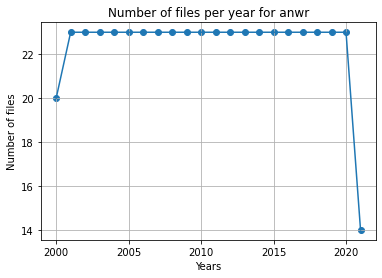

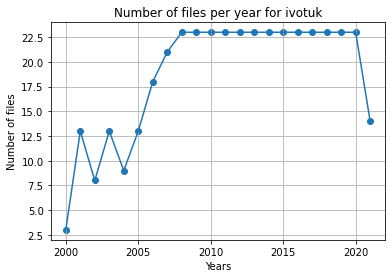

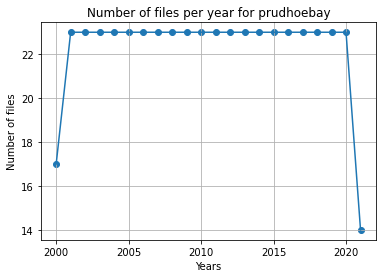

In [5]:
bar_files_by(files, "year")

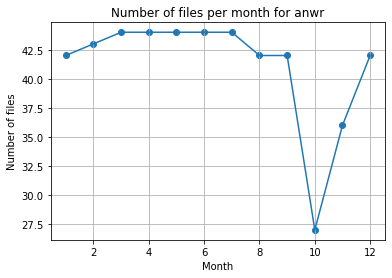

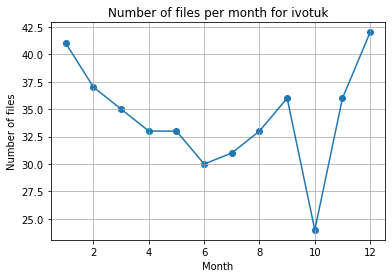

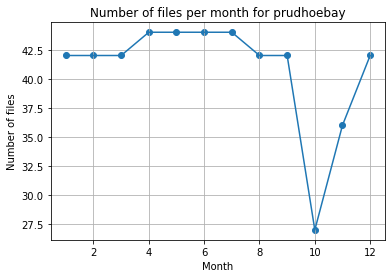

In [6]:
bar_files_by(files, "month")

In [7]:
masks = {"anwr": get_mask(rasterio.open(files['anwr'][0]), labels['anwr']),
        "ivotuk": get_mask(rasterio.open(files['ivotuk'][0]), labels['ivotuk']),
        "prudhoebay": get_mask(rasterio.open(files['prudhoebay'][0]), labels['prudhoebay'])}

/home/aryal007/anaconda3/envs/py36/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


### ANWR NDVI Sample

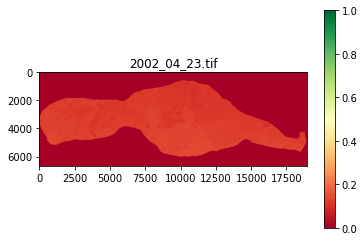

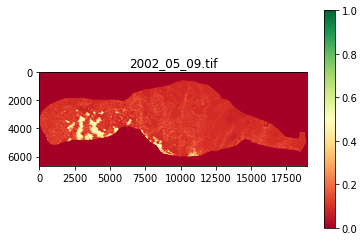

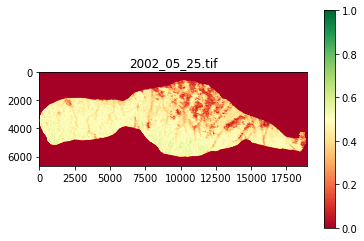

In [8]:
for i in range(50,53):
    vis_tiff(files['anwr'][i], masks['anwr'], vmax=1)

### ivotuk NDVI sample

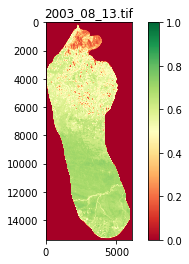

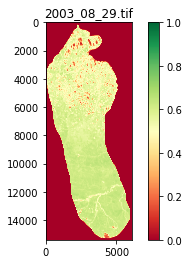

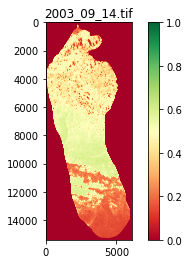

In [14]:
for i in range(28,31):
    vis_tiff(files['ivotuk'][i], masks['ivotuk'], vmax=1)

### prudhoebay NDVI samples

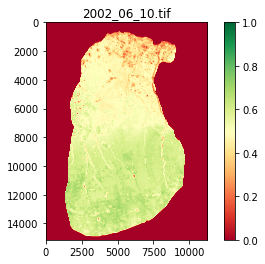

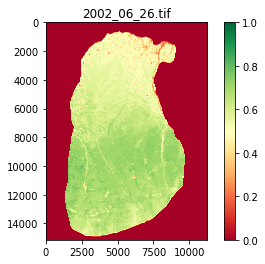

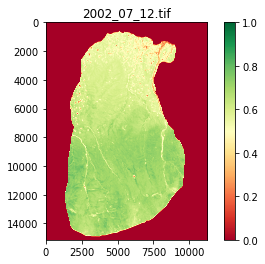

In [10]:
for i in range(50,53):
    vis_tiff(files['prudhoebay'][i], masks['prudhoebay'], vmax=1)

In [11]:
for key, value in masks.items():
    OUT_DIR = Path(f"/datadrive/MODIS_NDVI_Alaska/modis/tiffs_numpy/{key}")
    if not os.path.exists(OUT_DIR):
        os.makedirs(OUT_DIR, exist_ok=True)
    for i, f in enumerate(files[key]):
        print(f"{key} image {i+1} out of {len(files[key])}")
        save_tiff_numpy(OUT_DIR, f, value)    

anwr image 1 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2000_02_18.tif
anwr image 2 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2000_03_05.tif
anwr image 3 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2000_03_21.tif
anwr image 4 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2000_04_06.tif
anwr image 5 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2000_04_22.tif
anwr image 6 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2000_05_08.tif
anwr image 7 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2000_05_24.tif
anwr image 8 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2000_06_09.tif
anwr image 9 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2000_06_25.tif
anwr image 10 out of 494
Filename: /datadrive/MODIS_NDV

anwr image 79 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2003_07_12.tif
anwr image 80 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2003_07_28.tif
anwr image 81 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2003_08_13.tif
anwr image 82 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2003_08_29.tif
anwr image 83 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2003_09_14.tif
anwr image 84 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2003_09_30.tif
anwr image 85 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2003_10_16.tif
anwr image 86 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2003_11_01.tif
anwr image 87 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2003_11_17.tif
anwr image 88 out of 494
Filename: /datadrive/

anwr image 156 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2006_11_17.tif
anwr image 157 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2006_12_03.tif
anwr image 158 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2006_12_19.tif
anwr image 159 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2007_01_01.tif
anwr image 160 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2007_01_17.tif
anwr image 161 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2007_02_02.tif
anwr image 162 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2007_02_18.tif
anwr image 163 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2007_03_06.tif
anwr image 164 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2007_03_22.tif
anwr image 165 out of 494
Filename: /

anwr image 233 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2010_03_22.tif
anwr image 234 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2010_04_07.tif
anwr image 235 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2010_04_23.tif
anwr image 236 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2010_05_09.tif
anwr image 237 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2010_05_25.tif
anwr image 238 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2010_06_10.tif
anwr image 239 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2010_06_26.tif
anwr image 240 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2010_07_12.tif
anwr image 241 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2010_07_28.tif
anwr image 242 out of 494
Filename: /

anwr image 310 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2013_07_28.tif
anwr image 311 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2013_08_13.tif
anwr image 312 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2013_08_29.tif
anwr image 313 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2013_09_14.tif
anwr image 314 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2013_09_30.tif
anwr image 315 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2013_10_16.tif
anwr image 316 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2013_11_01.tif
anwr image 317 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2013_11_17.tif
anwr image 318 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2013_12_03.tif
anwr image 319 out of 494
Filename: /

anwr image 387 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2016_12_02.tif
anwr image 388 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2016_12_18.tif
anwr image 389 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2017_01_01.tif
anwr image 390 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2017_01_17.tif
anwr image 391 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2017_02_02.tif
anwr image 392 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2017_02_18.tif
anwr image 393 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2017_03_06.tif
anwr image 394 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2017_03_22.tif
anwr image 395 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2017_04_07.tif
anwr image 396 out of 494
Filename: /

anwr image 464 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2020_04_06.tif
anwr image 465 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2020_04_22.tif
anwr image 466 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2020_05_08.tif
anwr image 467 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2020_05_24.tif
anwr image 468 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2020_06_09.tif
anwr image 469 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2020_06_25.tif
anwr image 470 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2020_07_11.tif
anwr image 471 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2020_07_27.tif
anwr image 472 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/anwr/2020_08_12.tif
anwr image 473 out of 494
Filename: /

ivotuk image 43 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2004_10_31.tif
ivotuk image 44 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2004_11_16.tif
ivotuk image 45 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2004_12_02.tif
ivotuk image 46 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2004_12_18.tif
ivotuk image 47 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2005_01_01.tif
ivotuk image 48 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2005_01_17.tif
ivotuk image 49 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2005_02_02.tif
ivotuk image 50 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2005_02_18.tif
ivotuk image 51 out of 411
Filename: /datadrive/MODIS_ND

ivotuk image 113 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2008_08_12.tif
ivotuk image 114 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2008_08_28.tif
ivotuk image 115 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2008_09_13.tif
ivotuk image 116 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2008_09_29.tif
ivotuk image 117 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2008_10_15.tif
ivotuk image 118 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2008_10_31.tif
ivotuk image 119 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2008_11_16.tif
ivotuk image 120 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2008_12_02.tif
ivotuk image 121 out of 411
Filename: /datadrive

ivotuk image 182 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2011_08_13.tif
ivotuk image 183 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2011_08_29.tif
ivotuk image 184 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2011_09_14.tif
ivotuk image 185 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2011_09_30.tif
ivotuk image 186 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2011_10_16.tif
ivotuk image 187 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2011_11_01.tif
ivotuk image 188 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2011_11_17.tif
ivotuk image 189 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2011_12_03.tif
ivotuk image 190 out of 411
Filename: /datadrive

ivotuk image 251 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2014_08_13.tif
ivotuk image 252 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2014_08_29.tif
ivotuk image 253 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2014_09_14.tif
ivotuk image 254 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2014_09_30.tif
ivotuk image 255 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2014_10_16.tif
ivotuk image 256 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2014_11_01.tif
ivotuk image 257 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2014_11_17.tif
ivotuk image 258 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2014_12_03.tif
ivotuk image 259 out of 411
Filename: /datadrive

ivotuk image 320 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2017_08_13.tif
ivotuk image 321 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2017_08_29.tif
ivotuk image 322 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2017_09_14.tif
ivotuk image 323 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2017_09_30.tif
ivotuk image 324 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2017_10_16.tif
ivotuk image 325 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2017_11_01.tif
ivotuk image 326 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2017_11_17.tif
ivotuk image 327 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2017_12_03.tif
ivotuk image 328 out of 411
Filename: /datadrive

ivotuk image 389 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2020_08_12.tif
ivotuk image 390 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2020_08_28.tif
ivotuk image 391 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2020_09_13.tif
ivotuk image 392 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2020_09_29.tif
ivotuk image 393 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2020_10_15.tif
ivotuk image 394 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2020_10_31.tif
ivotuk image 395 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2020_11_16.tif
ivotuk image 396 out of 411
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/brw_atq_ivotuk/2020_12_02.tif
ivotuk image 397 out of 411
Filename: /datadrive

prudhoebay image 48 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2002_04_23.tif
prudhoebay image 49 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2002_05_09.tif
prudhoebay image 50 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2002_05_25.tif
prudhoebay image 51 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2002_06_10.tif
prudhoebay image 52 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2002_06_26.tif
prudhoebay image 53 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2002_07_12.tif
prudhoebay image 54 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2002_07_28.tif
prudhoebay image 55 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2002_08_13.tif
prudhoebay image 56 out of 491
Filename: /datadrive/MODI

prudhoebay image 118 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2005_05_09.tif
prudhoebay image 119 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2005_05_25.tif
prudhoebay image 120 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2005_06_10.tif
prudhoebay image 121 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2005_06_26.tif
prudhoebay image 122 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2005_07_12.tif
prudhoebay image 123 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2005_07_28.tif
prudhoebay image 124 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2005_08_13.tif
prudhoebay image 125 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2005_08_29.tif
prudhoebay image 126 out of 491
Filename: /datad

prudhoebay image 187 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2008_05_08.tif
prudhoebay image 188 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2008_05_24.tif
prudhoebay image 189 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2008_06_09.tif
prudhoebay image 190 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2008_06_25.tif
prudhoebay image 191 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2008_07_11.tif
prudhoebay image 192 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2008_07_27.tif
prudhoebay image 193 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2008_08_12.tif
prudhoebay image 194 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2008_08_28.tif
prudhoebay image 195 out of 491
Filename: /datad

prudhoebay image 256 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2011_05_09.tif
prudhoebay image 257 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2011_05_25.tif
prudhoebay image 258 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2011_06_10.tif
prudhoebay image 259 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2011_06_26.tif
prudhoebay image 260 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2011_07_12.tif
prudhoebay image 261 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2011_07_28.tif
prudhoebay image 262 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2011_08_13.tif
prudhoebay image 263 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2011_08_29.tif
prudhoebay image 264 out of 491
Filename: /datad

prudhoebay image 325 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2014_05_09.tif
prudhoebay image 326 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2014_05_25.tif
prudhoebay image 327 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2014_06_10.tif
prudhoebay image 328 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2014_06_26.tif
prudhoebay image 329 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2014_07_12.tif
prudhoebay image 330 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2014_07_28.tif
prudhoebay image 331 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2014_08_13.tif
prudhoebay image 332 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2014_08_29.tif
prudhoebay image 333 out of 491
Filename: /datad

prudhoebay image 394 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2017_05_09.tif
prudhoebay image 395 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2017_05_25.tif
prudhoebay image 396 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2017_06_10.tif
prudhoebay image 397 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2017_06_26.tif
prudhoebay image 398 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2017_07_12.tif
prudhoebay image 399 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2017_07_28.tif
prudhoebay image 400 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2017_08_13.tif
prudhoebay image 401 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2017_08_29.tif
prudhoebay image 402 out of 491
Filename: /datad

prudhoebay image 463 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2020_05_08.tif
prudhoebay image 464 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2020_05_24.tif
prudhoebay image 465 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2020_06_09.tif
prudhoebay image 466 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2020_06_25.tif
prudhoebay image 467 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2020_07_11.tif
prudhoebay image 468 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2020_07_27.tif
prudhoebay image 469 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2020_08_12.tif
prudhoebay image 470 out of 491
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs_reproject/prudhoebay/2020_08_28.tif
prudhoebay image 471 out of 491
Filename: /datad